In [1]:
%run -i 'ABS_model_and_fitting_functions.ipynb'

In [2]:
an_full = prepare_data("data_npy/39_dd.npy", 0, 0, chop=False)
lc_full = prepare_data("data_npy/39.npy", 0, 0, chop=False)

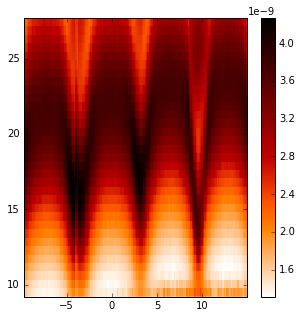

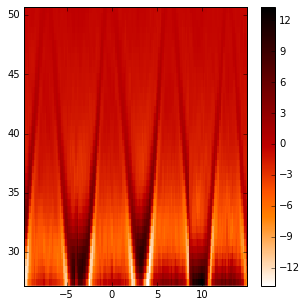

In [58]:
lc = prepare_data("data_npy/39.npy", 7, 40, chop=True)
an = prepare_data("data_npy/39_dd.npy", 18, 60, chop=True)
a, b = calibration_phase_axis(an, lc, 85, 95, 70, 80, plot=False)
# Put negative fluxes on the left
an['y'] *= -1
lc['y'] *= -1
plot_datascan(lc)
plot_datascan(an)

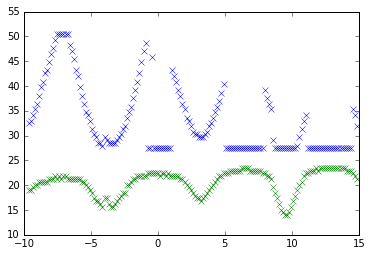

In [59]:
lc_line = peak_positions(lc)
abs_line = peak_positions(an)
# This leaves some spurious points close to flux = 0 and flux = 1 for the ABS line
plt.plot(an['y'], abs_line, 'x')
plt.plot(lc['y'], lc_line, 'x')

In [62]:
lc_line = zip(lc['y'][40:155], lc_line[40:155])
abs_line = zip(np.concatenate((an['y'][39:57], an['y'][70:95])),
               np.concatenate((abs_line[39:57], abs_line[70:95])))

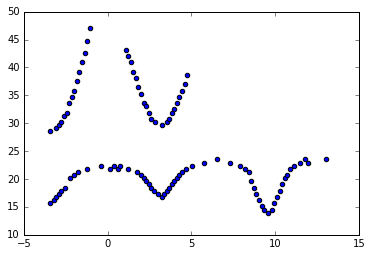

In [63]:
lines = merge_points([lc_line, abs_line])
phase, frequency = zip(*lines)
plt.scatter(phase, frequency)

## Fit with one free parameter

In [64]:
%%capture
p0 = [0.6]
fit_1 = fit_abs_model(lines, 64, p0, Ej=39.8, Ec=5.65, Ea=28.95)

In [65]:
fit_1['popt']

array([ 0.7659308])

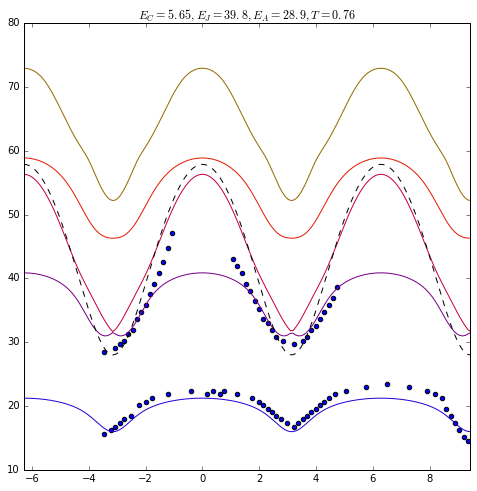

In [66]:
plot_fit_results(fit_1, lines, Ej=39.8, Ec=5.65, Ea=28.95, flux_final=4*np.pi, n_fluxes=200)

## Fit with two free parameters

In [67]:
%%capture
p0 = [20, 0.6]
fit_2 = fit_abs_model(lines, 64, p0, Ej=39.8, Ec=5.65)

In [68]:
fit_2['popt']

array([ 26.51483833,   0.72913967])

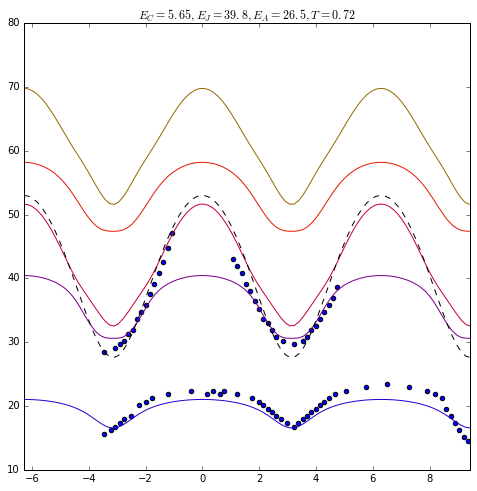

In [69]:
plot_fit_results(fit_2, lines, Ej=39.8, Ec=5.65)

## Fit with three free parameters

In [70]:
%%capture
p0 = [5.65, 30, 0.7]
fit_3 = fit_abs_model(lines, 64, p0, Ej=39.8)

In [71]:
fit_3['popt']

array([  6.84594311,  25.77680975,   0.73929132])

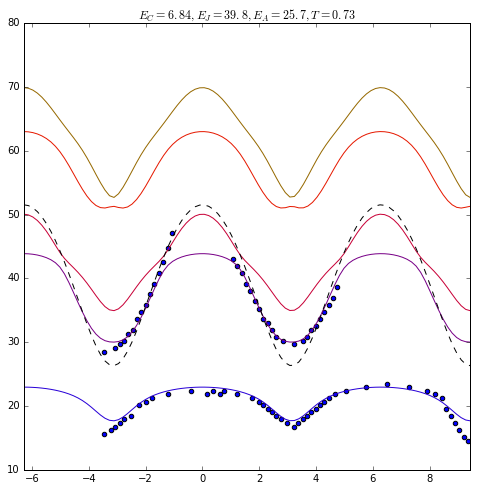

In [72]:
plot_fit_results(fit_3, lines, Ej=39.8)

## Fit with four free parameters

In [73]:
%%capture
p0 = [5.65, 40, 30, 0.6]
fit_4 = fit_abs_model(lines, 64, p0, max_tol=2e-6)

In [74]:
fit_4['popt']

array([  5.93122156,  39.95181316,  49.99997156,   0.67453297])

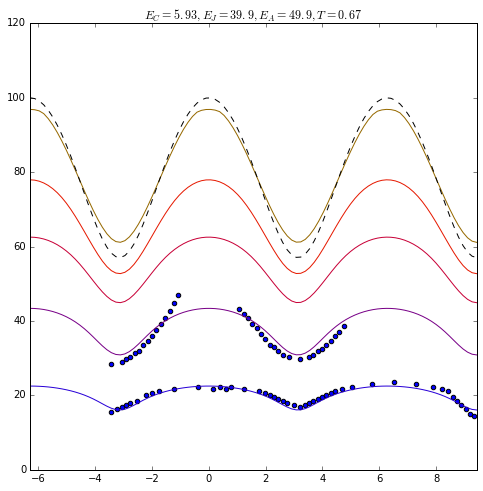

In [75]:
plot_fit_results(fit_4, lines)